In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
URL=['https://www.cars24.com/buy-used-cars-hyderabad/?itm_source=Cars24Website&itm_medium=sticky_header',
     'https://www.cars24.com/buy-used-cars-new-delhi/?itm_source=Cars24Website&itm_medium=sticky_header',
    'https://www.cars24.com/buy-used-cars-bengaluru/?itm_source=Cars24Website&itm_medium=sticky_header',
    'https://www.cars24.com/buy-used-car?sort=P&storeCityId=2378&pinId=400001&pinId=400001']
  

In [4]:
for i in range(2, 4):
    URL.append('https://www.cars24.com/buy-used-cars-hyderabad/?itm_source=Cars24Website&itm_medium=sticky_header&page={}'.
                                                                                                                    format(i))
for i in range(2,9):
    URL.append('https://www.cars24.com/buy-used-cars-new-delhi/?itm_source=Cars24Website&itm_medium=sticky_header&page={}'.
                                                                                                                    format(i))
for i in range(2,15):
    URL.append('https://www.cars24.com/buy-used-cars-bengaluru/?itm_source=Cars24Website&itm_medium=sticky_header&page={}'.
                                                                                                                    format(i))
for i in range(2,23):
    URL.append('https://www.cars24.com/buy-used-car?sort=P&storeCityId=2378&pinId=400001&page={}'.format(i))
    

In [5]:
%%time

cnames = []
c_type = []
c_details = []
c_price = []
EMI = []
discount = []
location=[]

for url in URL:
    
    page = requests.get(url)
    htmlCode = page.text
    
    soup = BeautifulSoup(htmlCode)
    
    for x in soup.find_all('div', attrs={'class' : 'col-4'}):

        name = x.find('h2', attrs={'class' : '_3FpCg'})
        if name is None:
            cnames.append(np.NaN)
        else:
            cnames.append(name.text)

        c_t = x.find('p', attrs={'class' : 'cvakB'})
        if c_t is None:
            c_type.append(np.NaN)
        else:
            c_type.append(c_t.text)

        details = x.find('ul', attrs={'class' : 'bVR0c'})
        if details is None:
            c_details.append(np.NaN)
        else:
            c_details.append(details.text)

        price = x.find('div', attrs={'class' : '_7udZZ'})
        if price is None:
            c_price.append(np.NaN)
        else:
            c_price.append(price.text)
            
        emi = x.find('div', attrs={'class' : '_2HFRN'})
        if emi is None:
            EMI.append(np.NaN)
        else:
            EMI.append(emi.text)
            
        disc = x.find('div', attrs={'class' : '_3mZ8j'})
        if disc is None:
            discount.append(np.NaN)
        else:
            discount.append(disc.text)
            
        if 'hyderabad' in url:
            location.append('Hyderabad')
        elif 'new-delhi' in url:
            location.append('New Delhi')
        elif 'bengaluru' in url:
            location.append('Bengaluru')
        elif 'CityId=2378' in url:
            location.append('Mumbai')
        else: 
            location.append(np.NaN)
                
            

Wall time: 26.5 s


In [6]:
print(len(cnames))
print(len(c_type))
print(len(c_details))
print(len(c_price))
print(len(EMI))
print(len(discount))
print(len(location))

852
852
852
852
852
852
852


In [7]:
df = pd.DataFrame({'Name' : cnames, 'Type' : c_type, 'Details' : c_details, 'Price' : c_price,'EMI':EMI,'Discount':discount,
                  'Location':location})

In [8]:
df

,Name,Type,Details,Price,EMI,Discount,Location
0,2013 Nissan Sunny,XV DIESEL Manual,"165,352 km1st OwnerDiesel","₹423,099","₹9,412/month","₹23,000 OFF",Hyderabad
1,2014 Honda City,V MT PETROL Manual,"40,798 km1st OwnerPetrol","₹557,399","₹12,399/month","₹30,000 OFF",Hyderabad
2,2017 Hyundai Elite i20,ASTA 1.2 DUAL TONE Manual,"63,730 km1st OwnerPetrol","₹658,599","₹14,650/month","₹10,000 OFF",Hyderabad
3,2017 Honda Jazz,VX 1.2 Manual,"75,366 km2nd OwnerPetrol","₹574,199","₹12,773/month","₹31,000 OFF",Hyderabad
4,2017 Maruti Baleno,DELTA 1.2 K12 Manual,"44,103 km1st OwnerPetrol","₹551,399","₹12,266/month","₹14,000 OFF",Hyderabad
...,...,...,...,...,...,...,...
847,2018 Honda City,VX CVT PETROL Automatic,"17,138 km2nd OwnerPetrol","₹983,099","₹21,868/month","₹45,000 OFF",Mumbai
848,2018 Hyundai Eon,SPORTZ Manual,"5,701 km1st OwnerPetrol","₹363,999","₹8,097/month","₹20,000 OFF",Mumbai
849,2016 Hyundai Grand i10,SPORTZ 1.2 KAPPA VTVT Manual,"6,353 km1st OwnerPetrol","₹451,699","₹10,048/month","₹39,000 OFF",Mumbai
850,2017 Maruti Dzire,ZXI Manual,"37,024 km1st OwnerPetrol","₹562,099","₹12,504/month","₹50,000 OFF",Mumbai


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      772 non-null    object
 1   Type      772 non-null    object
 2   Details   772 non-null    object
 3   Price     772 non-null    object
 4   EMI       772 non-null    object
 5   Discount  763 non-null    object
 6   Location  852 non-null    object
dtypes: object(7)
memory usage: 46.7+ KB


In [10]:
df.to_csv('Used_Cars_Details.csv', index = False)

In [11]:
df=pd.read_csv("Used_Cars_Details.csv")

In [12]:
# Identifying missing values in columns
df.isnull().sum()

Name        80
Type        80
Details     80
Price       80
EMI         80
Discount    89
Location     0
dtype: int64

In [13]:
# Columns with atleast one missing value
df.isnull().any(axis=0)

Name         True
Type         True
Details      True
Price        True
EMI          True
Discount     True
Location    False
dtype: bool

In [14]:
# Columns with all missing values
df.isnull().all(axis=0)

Name        False
Type        False
Details     False
Price       False
EMI         False
Discount    False
Location    False
dtype: bool

In [15]:
# Number of columns with all missing values
df.isnull().all(axis=0).sum()

0

In [16]:
# Rows with atleast one missing values
df.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
847    False
848    False
849    False
850    False
851    False
Length: 852, dtype: bool

In [17]:
#Rows with all missing values
df.isnull().all(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
847    False
848    False
849    False
850    False
851    False
Length: 852, dtype: bool

In [18]:
# Number of rows with all missing values
df.isnull().all(axis=1).sum()

0

In [19]:
#Missing values Treatment in Columns
round(100*(df.isnull().sum()/len(df.index)), 2)

Name         9.39
Type         9.39
Details      9.39
Price        9.39
EMI          9.39
Discount    10.45
Location     0.00
dtype: float64

In [20]:
df[df.isnull().sum(axis=1) >= 4]

,Name,Type,Details,Price,EMI,Discount,Location
5,NaN,NaN,NaN,NaN,NaN,NaN,Hyderabad
6,NaN,NaN,NaN,NaN,NaN,NaN,Hyderabad
27,NaN,NaN,NaN,NaN,NaN,NaN,New Delhi
28,NaN,NaN,NaN,NaN,NaN,NaN,New Delhi
49,NaN,NaN,NaN,NaN,NaN,NaN,Bengaluru
...,...,...,...,...,...,...,...
798,NaN,NaN,NaN,NaN,NaN,NaN,Mumbai
819,NaN,NaN,NaN,NaN,NaN,NaN,Mumbai
820,NaN,NaN,NaN,NaN,NaN,NaN,Mumbai
841,NaN,NaN,NaN,NaN,NaN,NaN,Mumbai


In [21]:
# retaining the rows having <= 4 NaNs
df = df[df.isnull().sum(axis=1) <= 4]

# look at the summary again
round(100*(df.isnull().sum()/len(df.index)), 2)

Name        0.00
Type        0.00
Details     0.00
Price       0.00
EMI         0.00
Discount    1.17
Location    0.00
dtype: float64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772 entries, 0 to 851
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      772 non-null    object
 1   Type      772 non-null    object
 2   Details   772 non-null    object
 3   Price     772 non-null    object
 4   EMI       772 non-null    object
 5   Discount  763 non-null    object
 6   Location  772 non-null    object
dtypes: object(7)
memory usage: 48.2+ KB


In [23]:
df['Name'].value_counts()

2016 Hyundai Grand i10       20
2018 Maruti Vitara Brezza    17
2018 Ford Ecosport           14
2017 Maruti Baleno           12
2017 Maruti Alto 800         12
                             ..
2013 Honda Amaze              1
2017 Toyota Camry             1
2019 Hyundai Verna            1
2013 Honda Brio               1
2020 Tata Tiago               1
Name: Name, Length: 266, dtype: int64

In [24]:
import re
regex = r'^2\d+'

df['Year'] = df['Name'].apply(lambda x : re.findall(regex, x) if x!='NaN' else x)
df.Year = df.Year.apply(lambda x: "".join(x))
df.Year=df.Year.astype(int)

In [25]:
df.Year.value_counts()

2017    166
2018    137
2016    112
2019     97
2015     80
2014     64
2020     36
2012     29
2013     29
2011     10
2009      5
2010      4
2021      3
Name: Year, dtype: int64

In [26]:
b=[]

for i in df['Name'] :
    if i == 0:
        b.append(0)
    else:
        b.append(i.split()[1])
df['Brand'] = b

In [27]:
df.Brand.value_counts()

Maruti        354
Hyundai       191
Ford           53
Honda          50
Renault        24
Tata           23
Volkswagen     22
Toyota         14
KIA            11
Skoda           8
MG              7
Mahindra        4
Datsun          3
Nissan          2
BMW             2
Jeep            1
Ssangyong       1
Mercedes        1
Audi            1
Name: Brand, dtype: int64

In [28]:
c=[]
for i in df['Name'] :
    if i == 0:
        c.append(0)
    else:
        c.append(i.split()[2:])
df['Model']=c
df.Model = df.Model.apply(lambda x: " ".join(x) if x!='NaN' else x)

In [29]:
df.Model.value_counts()

Grand i10           54
Vitara Brezza       45
Swift               45
Ecosport            41
Elite i20           34
                    ..
Wagon R              1
Compass              1
BR-V                 1
Wagon R Stingray     1
Sunny                1
Name: Model, Length: 87, dtype: int64

In [30]:
df.Model.isnull().any()

False

In [31]:
regex = r'(?:Manual|Automatic)'
df['car_type'] = df.Type.apply(lambda x : re.findall(regex,x) if x!='NaN' else x)
df.car_type = df.car_type.apply(lambda x: "".join(x))

In [32]:
df[df['car_type']==""]['Brand'].mode()

0    Hyundai
dtype: object

In [33]:
df[df["Brand"]=="Hyundai"]['car_type'].mode()

0    Manual
dtype: object

In [34]:
df.car_type.replace(to_replace="",value="Manual",inplace=True,regex=True)

In [35]:
df.car_type.unique()

array(['Manual', 'Automatic'], dtype=object)

In [36]:
df['Type'].replace(to_replace=["Manual","Automatic"],value="",inplace=True,regex=True)

In [37]:
df.Type.value_counts()

VXI                      73
VDI                      26
LXI                      26
DELTA 1.2 K12            21
ZDI                      17
                         ..
1.2 KAPPA SPORTZ (O)      1
E200 CGI EDITION E        1
1.6 S                     1
XV DIESEL                 1
ALPHA DDIS 190            1
Name: Type, Length: 292, dtype: int64

In [38]:
df.Details.value_counts()

21,666 km1st OwnerPetrol    2
15,112 km1st OwnerPetrol    2
36,351 km1st OwnerPetrol    1
26,862 km1st OwnerPetrol    1
24,169 km1st OwnerDiesel    1
                           ..
52,550 km1st OwnerPetrol    1
15,511 km1st OwnerDiesel    1
45,572 km1st OwnerPetrol    1
57,492 km1st OwnerPetrol    1
24,793 km1st OwnerPetrol    1
Name: Details, Length: 770, dtype: int64

In [39]:
regex = r'([,\d]+\skm)'
df['km'] = df.Details.apply(lambda x : re.findall(regex,x) if x!="NaN" else x)
df.km = df.km.apply(lambda x: "".join(x))
df['km'].replace(to_replace=["km",','],value="",inplace=True,regex=True)
df.km=df.km.astype(int)

In [40]:
regex = r'(?:1st|2nd)'
df['owner'] = df.Details.apply(lambda x : re.findall(regex,x) if x!='NaN' else x)
df.owner = df.owner.apply(lambda x: "".join(x))

In [41]:
df[df['owner']==""]['Year'].mode()

0    2015
dtype: int32

In [42]:
df[df["Year"]==2015]['owner'].mode()

0    1st
dtype: object

In [43]:
df.owner.replace(to_replace="",value="1st",inplace=True,regex=True)
df.owner.unique()

array(['1st', '2nd'], dtype=object)

In [44]:
regex = r'(?:Petrol|Diesel)'
df['fuel'] = df.Details.apply(lambda x : re.findall(regex,x) if x!='NaN' else x)
df.fuel = df.fuel.apply(lambda x: "".join(x))

In [45]:
df['Price'].replace(to_replace=["₹",","],value="",inplace=True,regex=True)
df.Price=df.Price.astype(int)
df['Price'].isnull().sum()

0

In [46]:
df['EMI'].replace(to_replace=["₹",",","/month"],value="",inplace=True,regex=True)
df.EMI=df.EMI.astype(int)
df['EMI'].isnull().sum()

0

In [91]:
df['Discount'].replace(to_replace=["₹",",","OFF"],value="",inplace=True,regex=True)
df.Discount=df.Discount.astype(int)
df['Discount'].isnull().sum()

0

In [76]:

df.Discount.unique()

array([' 23000 ', ' 30000 ', ' 10000 ', ' 31000 ', ' 14000 ', ' 27000 ',
       ' 24000 ', ' 36000 ', ' 20000 ', ' 16000 ', ' 18000 ', ' 33000 ',
       ' 5000 ', ' 35000 ', ' 32000 ', ' 50000 ', ' 7000 ', ' 42000 ',
       ' 26000 ', ' 25000 ', ' 28000 ', ' 41000 ', ' 29000 ', ' 38000 ',
       ' 40000 ', ' 9000 ', ' 34000 ', ' 13000 ', ' 21000 ', ' 37000 ',
       ' 22000 ', ' 19000 ', ' 15000 ', nan, ' 12000 ', ' 17000 ',
       ' 8000 ', ' 11000 ', ' 47000 ', ' 48000 ', ' 44000 ', ' 39000 ',
       ' 6000 ', ' 45000 ', ' 46000 ', ' 43000 ', ' 49000 ', ' 39880 '],
      dtype=object)

In [77]:
df['Discount'].fillna(df['Discount'].median(), inplace=True)
df.Discount=df.Discount.astype(int)

In [78]:
df.drop(["Name","Details"],axis=1,inplace=True)

In [79]:
df

,Type,Price,EMI,Discount,Location,Year,Brand,Model,car_type,km,owner,fuel
0,XV DIESEL,423099,9412,23000,Hyderabad,2013,Nissan,Sunny,Manual,165352,1st,Diesel
1,V MT PETROL,557399,12399,30000,Hyderabad,2014,Honda,City,Manual,40798,1st,Petrol
2,ASTA 1.2 DUAL TONE,658599,14650,10000,Hyderabad,2017,Hyundai,Elite i20,Manual,63730,1st,Petrol
3,VX 1.2,574199,12773,31000,Hyderabad,2017,Honda,Jazz,Manual,75366,2nd,Petrol
4,DELTA 1.2 K12,551399,12266,14000,Hyderabad,2017,Maruti,Baleno,Manual,44103,1st,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
847,VX CVT PETROL,983099,21868,45000,Mumbai,2018,Honda,City,Automatic,17138,2nd,Petrol
848,SPORTZ,363999,8097,20000,Mumbai,2018,Hyundai,Eon,Manual,5701,1st,Petrol
849,SPORTZ 1.2 KAPPA VTVT,451699,10048,39000,Mumbai,2016,Hyundai,Grand i10,Manual,6353,1st,Petrol
850,ZXI,562099,12504,50000,Mumbai,2017,Maruti,Dzire,Manual,37024,1st,Petrol


In [80]:
df=df.rename(columns = {'Type':'Engine_Type'})
df = df[['Year','Brand', 'Model', 'Engine_Type', 'car_type', "owner",'fuel','km','Price','Discount','EMI','Location']]

In [81]:
df

,Year,Brand,Model,Engine_Type,car_type,owner,fuel,km,Price,Discount,EMI,Location
0,2013,Nissan,Sunny,XV DIESEL,Manual,1st,Diesel,165352,423099,23000,9412,Hyderabad
1,2014,Honda,City,V MT PETROL,Manual,1st,Petrol,40798,557399,30000,12399,Hyderabad
2,2017,Hyundai,Elite i20,ASTA 1.2 DUAL TONE,Manual,1st,Petrol,63730,658599,10000,14650,Hyderabad
3,2017,Honda,Jazz,VX 1.2,Manual,2nd,Petrol,75366,574199,31000,12773,Hyderabad
4,2017,Maruti,Baleno,DELTA 1.2 K12,Manual,1st,Petrol,44103,551399,14000,12266,Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...
847,2018,Honda,City,VX CVT PETROL,Automatic,2nd,Petrol,17138,983099,45000,21868,Mumbai
848,2018,Hyundai,Eon,SPORTZ,Manual,1st,Petrol,5701,363999,20000,8097,Mumbai
849,2016,Hyundai,Grand i10,SPORTZ 1.2 KAPPA VTVT,Manual,1st,Petrol,6353,451699,39000,10048,Mumbai
850,2017,Maruti,Dzire,ZXI,Manual,1st,Petrol,37024,562099,50000,12504,Mumbai


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772 entries, 0 to 851
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         772 non-null    int32 
 1   Brand        772 non-null    object
 2   Model        772 non-null    object
 3   Engine_Type  772 non-null    object
 4   car_type     772 non-null    object
 5   owner        772 non-null    object
 6   fuel         772 non-null    object
 7   km           772 non-null    int32 
 8   Price        772 non-null    int32 
 9   Discount     772 non-null    int32 
 10  EMI          772 non-null    int32 
 11  Location     772 non-null    object
dtypes: int32(5), object(7)
memory usage: 79.5+ KB


<AxesSubplot:>

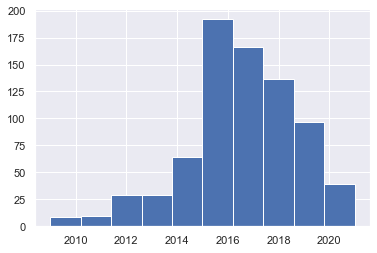

In [83]:
sns.set()
df['Year'].hist()

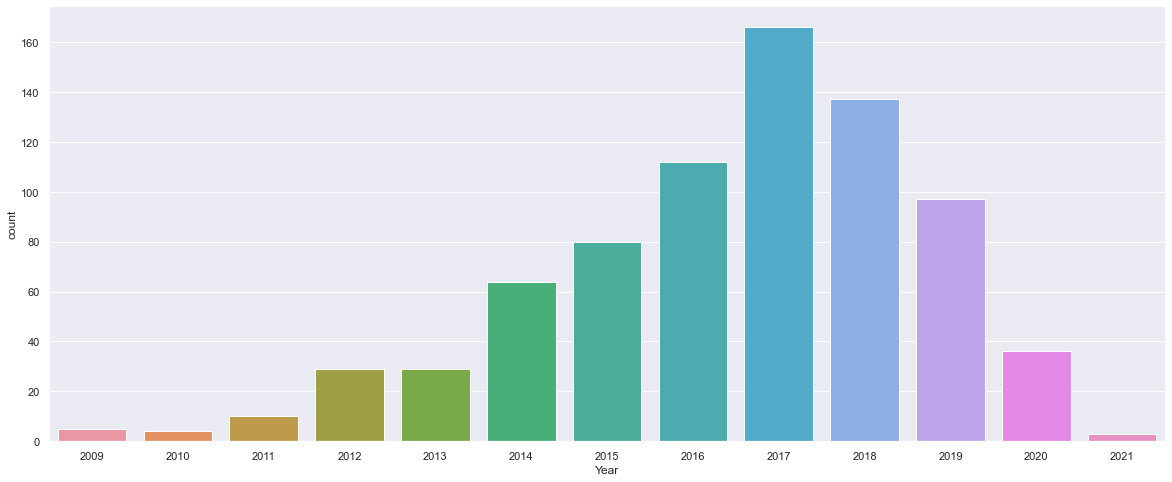

In [84]:
plt.figure(figsize=(20,8))
sns.countplot(df['Year'])
plt.show()

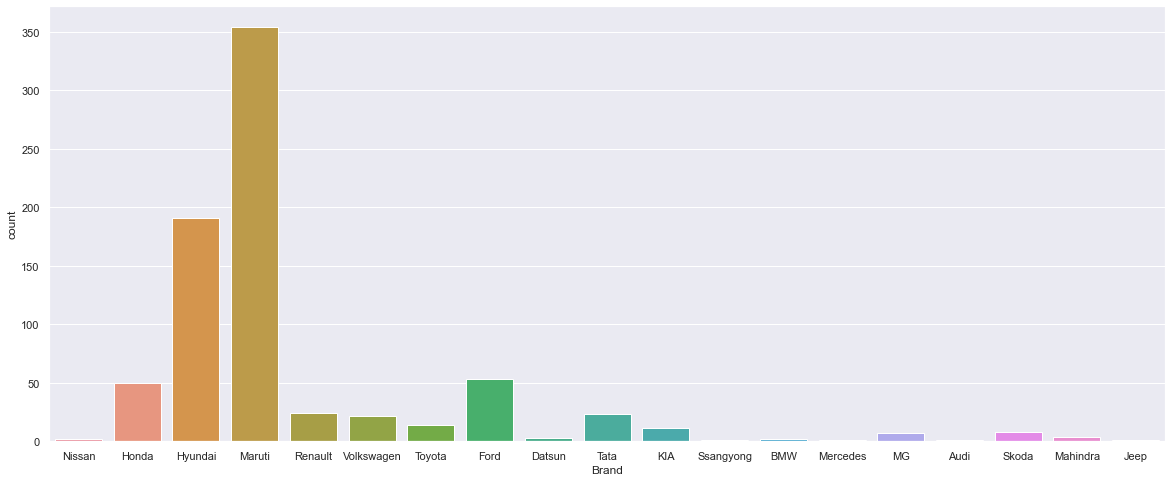

In [85]:
plt.figure(figsize=(20,8))
sns.countplot(df['Brand'])
plt.show()

<AxesSubplot:xlabel='Discount', ylabel='Density'>

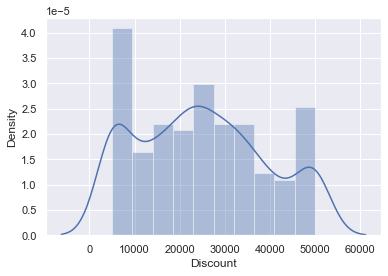

In [86]:
sns.distplot(df.Discount)

<AxesSubplot:>

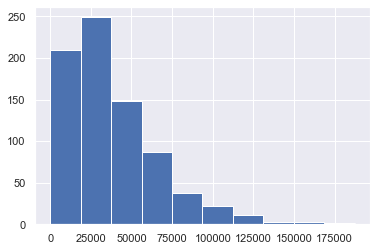

In [87]:
sns.set()
df['km'].hist()

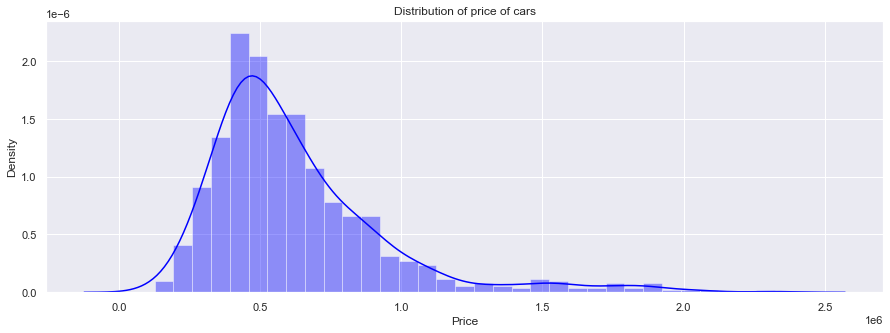

In [88]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(df['Price'], color = 'blue')
plt.title('Distribution of price of cars')
plt.show()

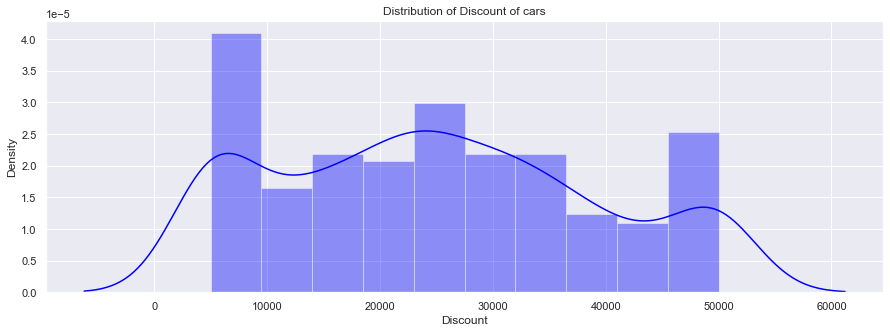

In [89]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(df['Discount'], color = 'blue')
plt.title('Distribution of Discount of cars')
plt.show()

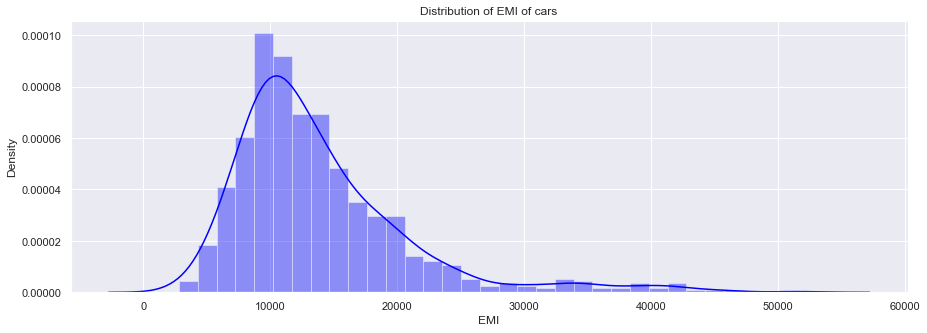

In [90]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(df['EMI'], color = 'blue')
plt.title('Distribution of EMI of cars')
plt.show()

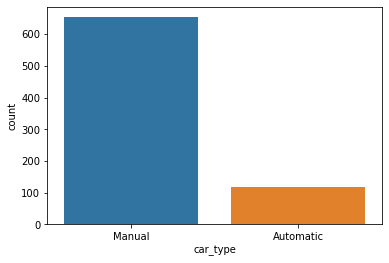

In [48]:
plt.figure(figsize=(6,4))
sns.countplot(df['car_type'])
plt.show()

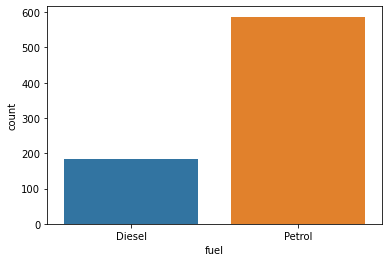

In [49]:
plt.figure(figsize=(6,4))
sns.countplot(df['fuel'])
plt.show()

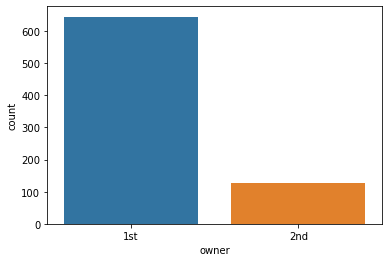

In [50]:
plt.figure(figsize=(6,4))
sns.countplot(df['owner'])
plt.show()

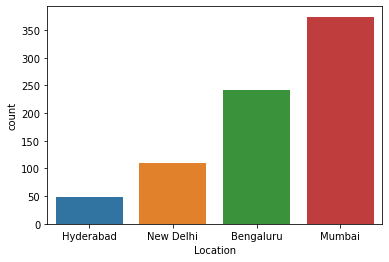

In [51]:
plt.figure(figsize=(6,4))
sns.countplot(df['Location'])
plt.show()

<AxesSubplot:xlabel='Year'>

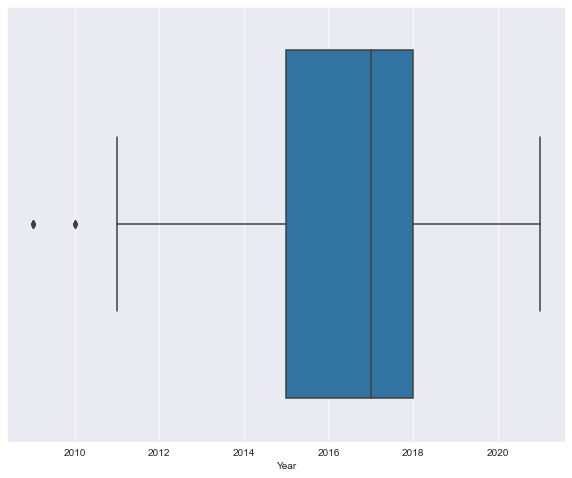

In [52]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['Year'])

In [53]:
df[df['Year']<2010]

,Name,Type,Details,Price,EMI,Discount,Location,Year,Brand,Model,car_type,km,owner,fuel
115,2009 Maruti Wagon R,LXI MINOR,"36,035 km1st OwnerPetrol",148199,3297,8000,New Delhi,2009,Maruti,Wagon R,Manual,36035,1st,Petrol
119,2009 Maruti Alto,LXI,"119,227 km1st OwnerPetrol",126399,2812,5000,New Delhi,2009,Maruti,Alto,Manual,119227,1st,Petrol
398,2009 Hyundai i10,MAGNA 1.2 AT,"58,491 km2nd OwnerPetrol",252399,5614,6000,Bengaluru,2009,Hyundai,i10,Automatic,58491,2nd,Petrol
432,2009 Hyundai i20,MAGNA 1.2 VTVT,"42,118 km2nd OwnerPetrol",325399,7238,23000,Bengaluru,2009,Hyundai,i20,Manual,42118,2nd,Petrol
768,2009 Maruti A Star,VXI,"94,540 km1st OwnerPetrol",186799,4155,10000,Mumbai,2009,Maruti,A Star,Manual,94540,1st,Petrol


<AxesSubplot:xlabel='Price'>

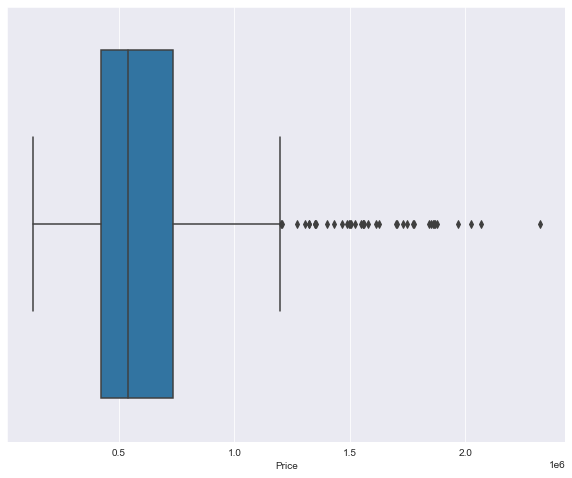

In [54]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['Price'])

<AxesSubplot:xlabel='Discount'>

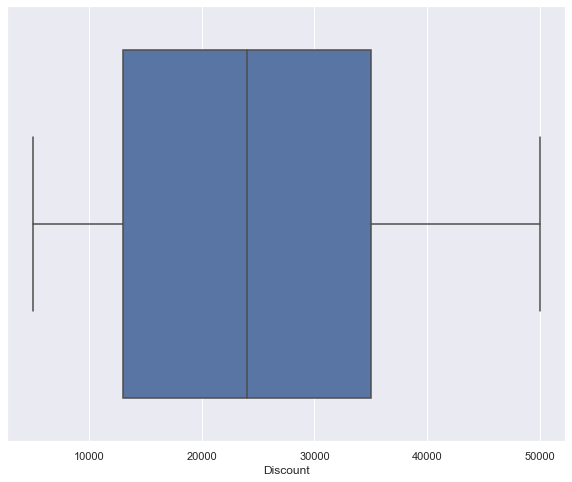

In [92]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['Discount'])

<AxesSubplot:xlabel='EMI'>

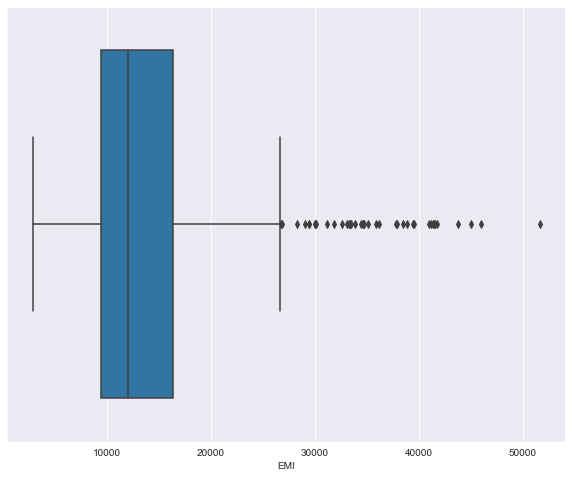

In [58]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['EMI'])

<AxesSubplot:xlabel='Brand', ylabel='Price'>

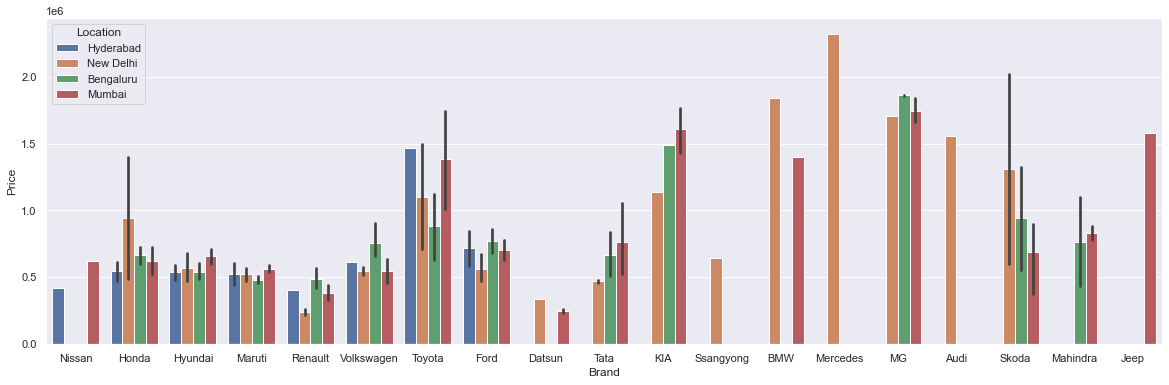

In [100]:
plt.figure(figsize=(20,6))
sns.barplot(x='Brand', y='Price',hue='Location',data=df)

In [60]:
df_loc=df.groupby('Location')

In [61]:
df_Hyderabad=df_loc.get_group('Hyderabad')

<AxesSubplot:xlabel='Brand', ylabel='Price'>

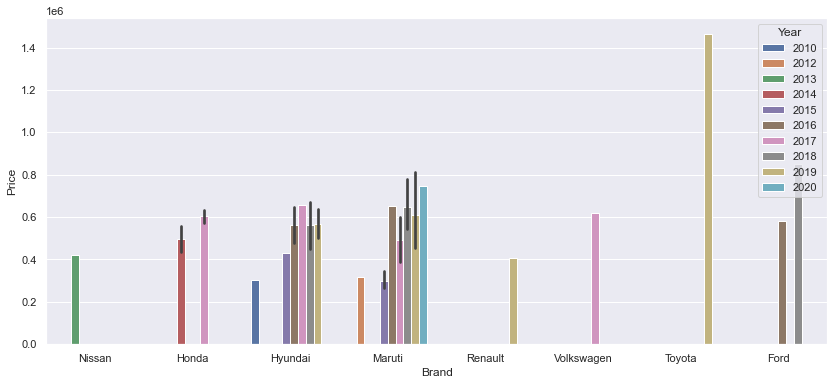

In [110]:
plt.figure(figsize=(14,6))
sns.barplot(x='Brand', y='Price', hue='Year', data=df_Hyderabad)

In [63]:
df_Hyd=df[(df['Year']>=2016)&(df['Location']=='Hyderabad')]

<AxesSubplot:xlabel='Brand', ylabel='Price'>

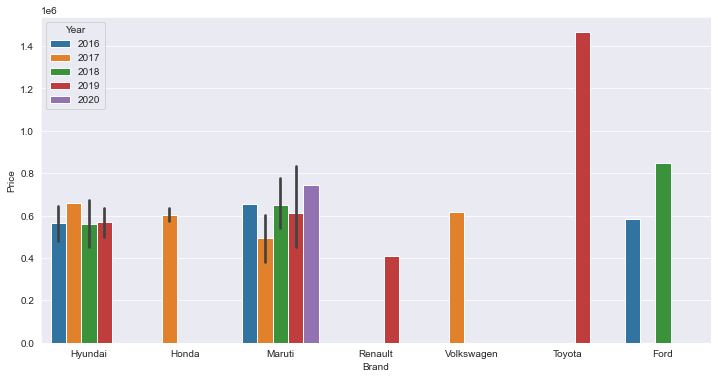

In [73]:
plt.figure(figsize=(12,6))
sns.barplot(x='Brand', y='Price', hue='Year', data=df_Hyd)

<AxesSubplot:xlabel='Brand', ylabel='EMI'>

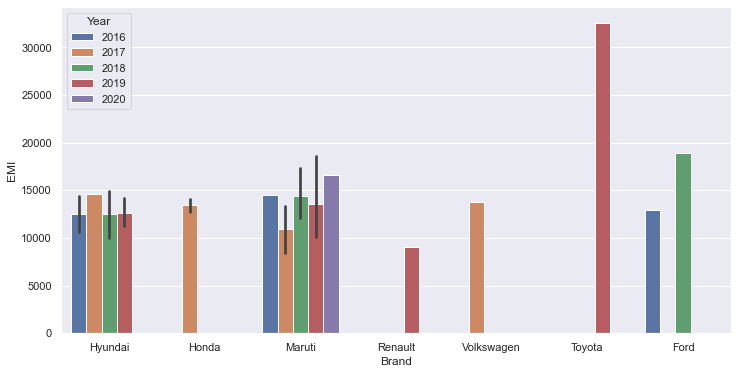

In [95]:
plt.figure(figsize=(12,6))
sns.barplot(x='Brand', y='EMI', hue='Year', data=df_Hyd)

<AxesSubplot:xlabel='Brand', ylabel='Price'>

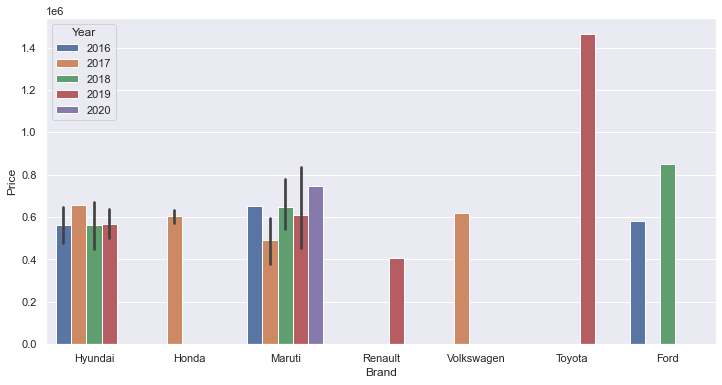

In [117]:
plt.figure(figsize=(12,6))
sns.barplot(x='Brand', y='Price', hue='Year', data=df_Hyd)

In [118]:
# df_Hyd1=df[(df['Year']>=2016)&(df['Location']=='Hyderabad')&(df['Price']<=df['Price'].Mean())]
# sns.barplot(x='Brand', y='Price', hue='Year', data=df_Hyd1)


<AxesSubplot:xlabel='Brand', ylabel='Price'>

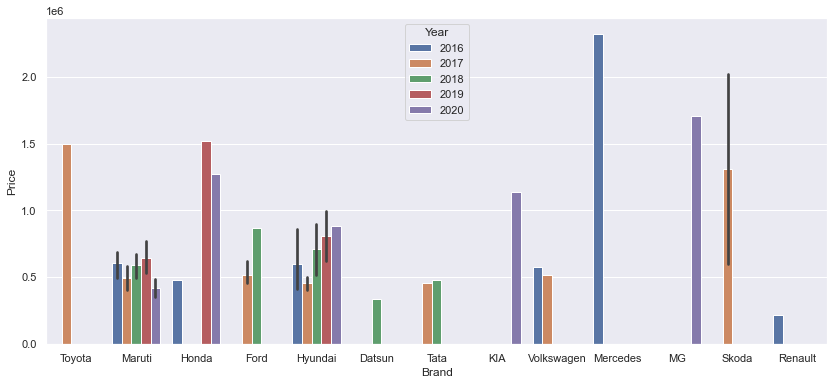

In [107]:
plt.figure(figsize=(14,6))
df_Delhi=df_loc.get_group('New Delhi')
df_Delhi=df[(df['Year']>=2016)&(df['Location']=='New Delhi')]
sns.barplot(x='Brand', y='Price', hue='Year', data=df_Delhi)

<AxesSubplot:xlabel='Brand', ylabel='Price'>

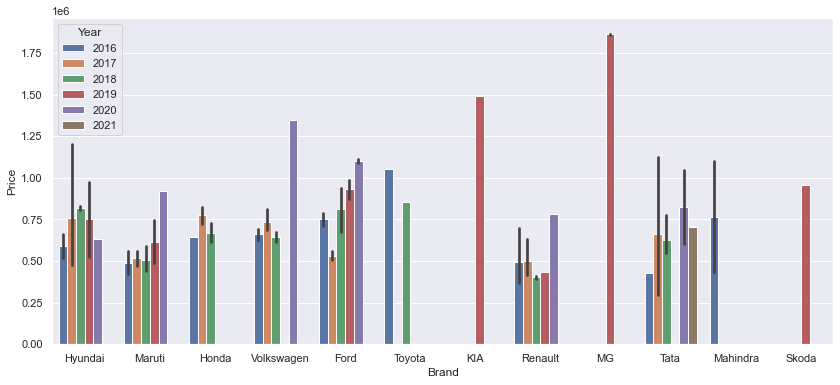

In [108]:
plt.figure(figsize=(14,6))
df_Bengaluru=df_loc.get_group('Bengaluru')
df_Bengaluru=df[(df['Year']>=2016)&(df['Location']=='Bengaluru')]
sns.barplot(x='Brand', y='Price', hue='Year', data=df_Bengaluru)

<AxesSubplot:xlabel='Brand', ylabel='Price'>

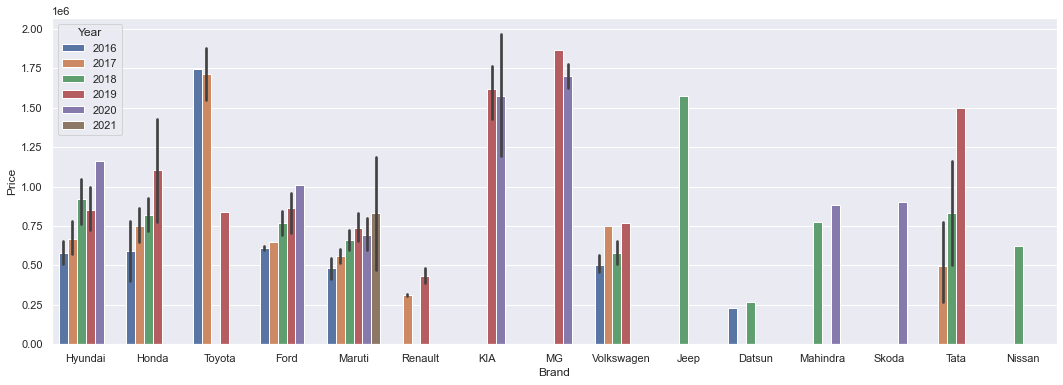

In [116]:
plt.figure(figsize=(18,6))
df_Mumbai=df_loc.get_group('Mumbai')
df_Mumbai=df[(df['Year']>=2016)&(df['Location']=='Mumbai')]
sns.barplot(x='Brand', y='Price', hue='Year', data=df_Mumbai)

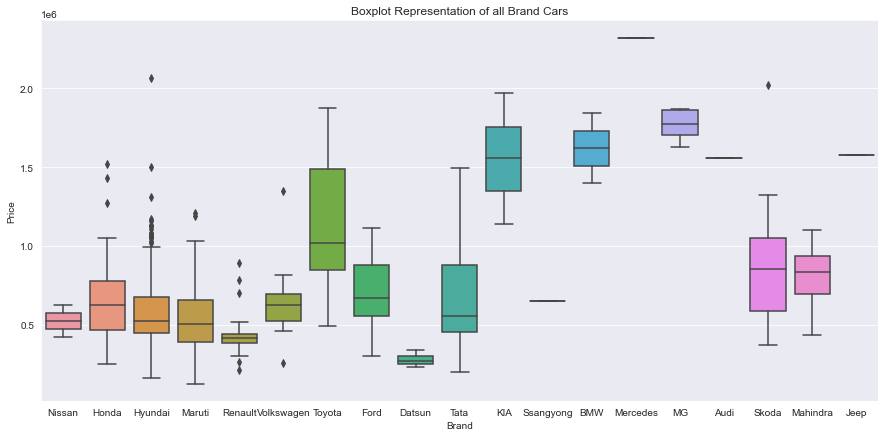

In [69]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='Brand',y='Price')
plt.title('Boxplot Representation of all Brand Cars')
plt.show()

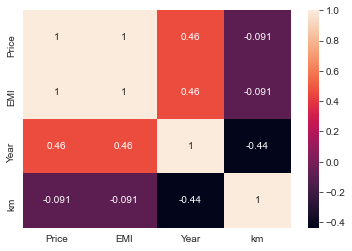

In [70]:
sns.heatmap(df.corr(), annot=True)
plt.show()

<Figure size 360x360 with 0 Axes>

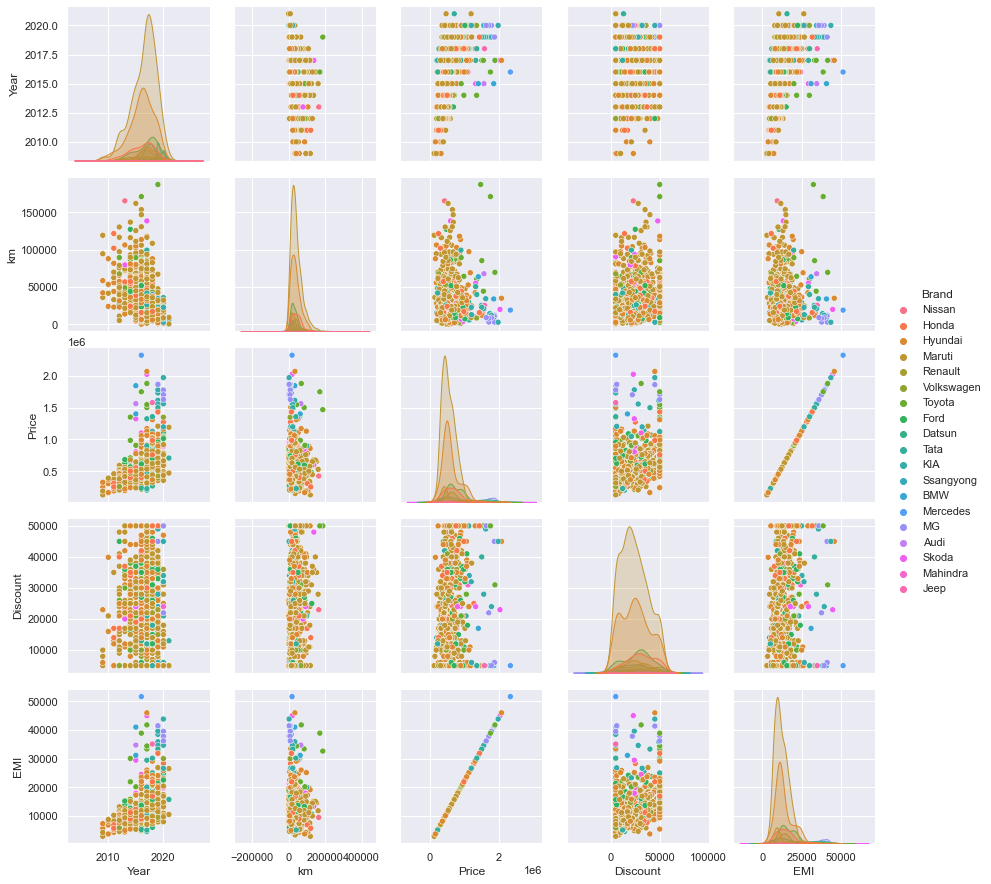

In [115]:
plt.figure(figsize=(5,5))
sns.pairplot(df,hue='Brand')
